In [1]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
from scipy import stats 



In [3]:
from sklearn.datasets import fetch_lfw_people
faces=fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)


['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Junichiro Koizumi' 'Tony Blair']
(1277, 62, 47)


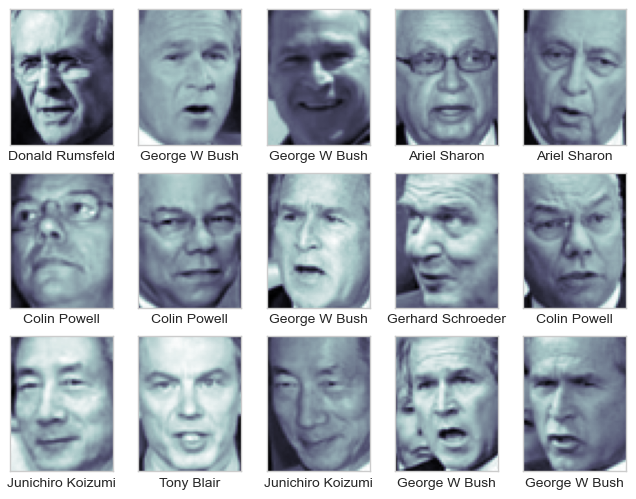

In [5]:
fig, ax = plt.subplots(3,5,figsize=(8,6))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i],cmap='bone')
    axi.set(xticks=[],yticks=[],
            xlabel=faces.target_names[faces.target[i]])


In [7]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
pca = PCA(n_components=150,whiten=True,
          svd_solver='randomized',random_state=42)
svc= SVC(kernel='rbf', class_weight='balanced')
model=make_pipeline(pca,svc)

In [13]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest=train_test_split(faces.data,faces.target,random_state=42)


from sklearn.model_selection import GridSearchCV
param_grid={'svc__C':[1,5,10,50],
            'svc__gamma': [0.0001,0.0005,0.001,0.005]}
grid= GridSearchCV(model,param_grid)

%time grid.fit(Xtrain,Ytrain)
print(grid.best_params_)

CPU times: total: 49 s
Wall time: 9.87 s
{'svc__C': 10, 'svc__gamma': 0.005}


In [15]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

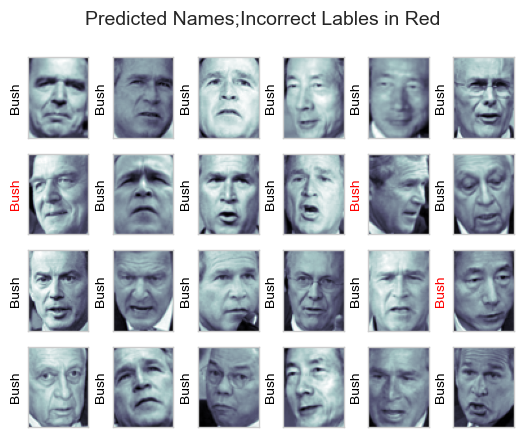

In [17]:
fig, ax = plt.subplots(4,6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62,47),cmap='bone')
    axi.set(xticks=[],yticks=[])
    axi.set_ylabel(faces.target_names[yfit[1]].split()[-1],
                   color='black' if yfit[i]==Ytest[i] else 'red')
fig.suptitle('Predicted Names;Incorrect Lables in Red',size=14);
